In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

In [5]:
df = pd.read_csv("ptt_daily_price.csv")
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,PTT.BK,PTT.BK,PTT.BK,PTT.BK,PTT.BK,PTT.BK
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-05-02,31.116962432861328,33.25,33.75,33.25,33.5,39656500
3,2024-05-03,31.584888458251953,33.75,33.75,33.25,33.25,32885000
4,2024-05-07,31.584888458251953,33.75,33.75,33.75,33.75,0


In [6]:
df_cleaned = df.iloc[2:].copy()
df_cleaned.head()

,Price,Adj Close,Close,High,Low,Open,Volume
2,2024-05-02,31.116962432861328,33.25,33.75,33.25,33.5,39656500
3,2024-05-03,31.584888458251953,33.75,33.75,33.25,33.25,32885000
4,2024-05-07,31.584888458251953,33.75,33.75,33.75,33.75,0
5,2024-05-08,31.584888458251953,33.75,34.0,33.5,33.75,63054700
6,2024-05-09,31.584888458251953,33.75,34.0,33.5,33.75,20770900


In [15]:
df_cleaned.rename(columns={"Price":"Date"}, inplace=True)
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
df_cleaned[cols] = df_cleaned[cols].apply(pd.to_numeric)
df_cleaned.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2,2024-05-02,31.116962,33.25,33.75,33.25,33.50,39656500
3,2024-05-03,31.584888,33.75,33.75,33.25,33.25,32885000
4,2024-05-07,31.584888,33.75,33.75,33.75,33.75,0
5,2024-05-08,31.584888,33.75,34.00,33.50,33.75,63054700
6,2024-05-09,31.584888,33.75,34.00,33.50,33.75,20770900


In [16]:
mean_close = df_cleaned["Close"].mean()
median_close = df_cleaned["Close"].median()
mode_close = df_cleaned["Close"].mode().iloc[0]

print(f"Mean : {mean_close}")
print(f"Median : {median_close}")
print(f"Mode : {mode_close}")

Mean : 32.17110266159696
Median : 32.25
Mode : 33.5


Histogram

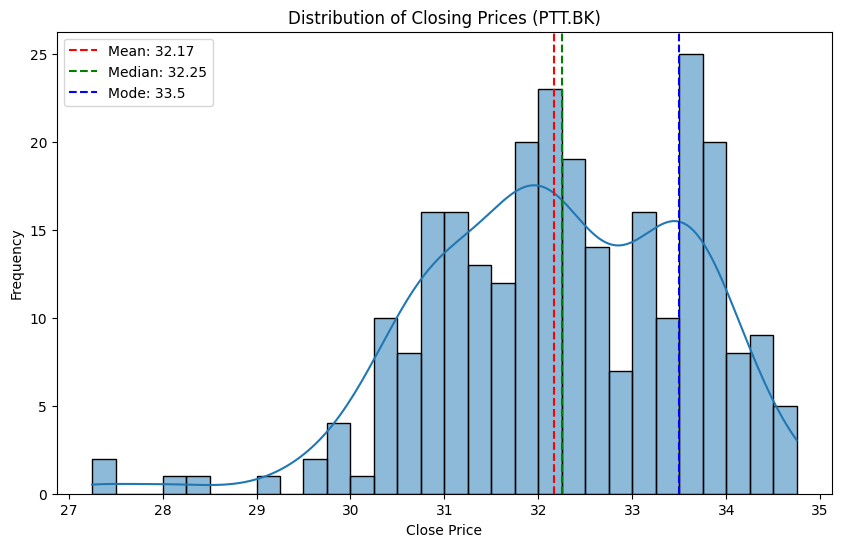

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned["Close"], kde=True, bins=30)
plt.axvline(mean_close, color='red', linestyle='--', label=f'Mean: {mean_close:.2f}')
plt.axvline(median_close, color='green', linestyle='--', label=f'Median: {median_close:.2f}')
plt.axvline(mode_close, color='blue', linestyle='--', label=f'Mode: {mode_close}')
plt.title("Distribution of Closing Prices (PTT.BK)")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Finding Outliers

In [18]:
close_prices = df_cleaned["Close"]

Q1 = close_prices.quantile(0.25)
Q3 = close_prices.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = close_prices[(close_prices < lower_bound)|(close_prices > upper_bound)]

print(f"จำนวน outliers : {len(outliers)}")
print(outliers)

จำนวน outliers : 2
213    27.25
214    27.25
Name: Close, dtype: float64


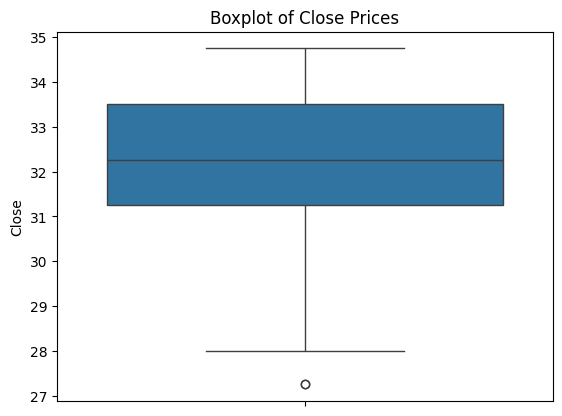

In [19]:
sns.boxplot(data=close_prices)
plt.title("Boxplot of Close Prices")
plt.show()

Covarience analysis

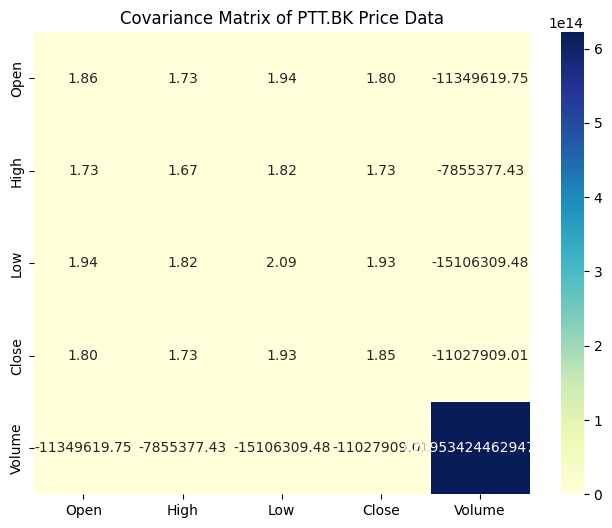

In [24]:
covarience = df_cleaned[["Open", "High", "Low", "Close", "Volume"]].cov()

plt.figure(figsize=(8,6))
sns.heatmap(covarience, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Covariance Matrix of PTT.BK Price Data")
plt.show()

Correlation analysis

            Open      High       Low     Close    Volume
Open    1.000000  0.981659  0.985374  0.968853 -0.333568
High    0.981659  1.000000  0.974576  0.982557 -0.243713
Low     0.985374  0.974576  1.000000  0.981152 -0.419309
Close   0.968853  0.982557  0.981152  1.000000 -0.325033
Volume -0.333568 -0.243713 -0.419309 -0.325033  1.000000


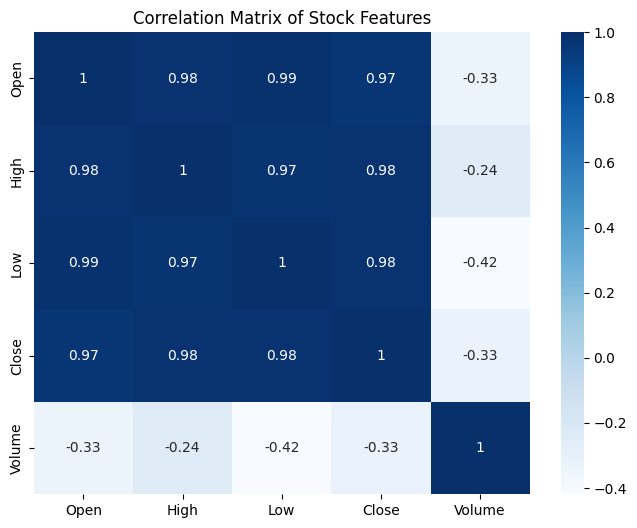

In [21]:
correlation = df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

print(correlation)

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Stock Features')
plt.show()

Hypothesis Testing (Paired t-test)

In [28]:
before = df_cleaned[(df_cleaned["Date"] >= "2025-04-01") & (df_cleaned["Date"] <= "2025-04-11")]["Close"]
after = df_cleaned[(df_cleaned["Date"] >= "2025-04-17") & (df_cleaned["Date"] <= "2025-04-28")]["Close"]

min_len = min(len(before), len(after))
before = before[:min_len]
after = after[:min_len]

t_stat, p_value = ttest_rel(before, after)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 3.464
P-value: 0.010
